In [1]:
import os
print(f"current dir: {os.getcwd()}")

import sys
print(f"python executable path: {sys.executable}")

current dir: /home/felipevzps/breast-cancer-prediction/notebooks
python executable path: /home/felipevzps/miniconda3/envs/breast-cancer-prediction/bin/python


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, Ridge

In [3]:
df = pd.read_csv("../data/breast_cancer_bd.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# mapping for "Class"
mapping = {
    2: 0,
    4: 1
}
df["Target_Class_Mapped"] = df["Class"].map(mapping)

In [5]:
# drop "Sample code number"
df = df.drop("Sample code number", axis=1)

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
 10  Target_Class_Mapped          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
Target_Class_Mapped             int64
dtype: object

In [9]:
na_counts = df.isna().sum()
na_counts

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
Target_Class_Mapped            0
dtype: int64

In [10]:
print(df["Bare Nuclei"].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [11]:
df = df.replace("?", np.nan)
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
 10  Target_Class_Mapped          699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [12]:
na_counts = df.isna().sum()
na_counts

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
Target_Class_Mapped             0
dtype: int64

In [13]:
# fill "Bare Nuclei" with median
df["Bare Nuclei"] = df["Bare Nuclei"].fillna(df["Bare Nuclei"].median())

In [14]:
na_counts = df.isna().sum()
na_counts

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
Target_Class_Mapped            0
dtype: int64

In [15]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Target_Class_Mapped
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


In [32]:
# selecting only numerical columns
num_cols = df.select_dtypes("int64", "float64").columns
print(num_cols)
print("total of numerical columns:", len(num_cols))


Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Class', 'Target_Class_Mapped'],
      dtype='object')
total of numerical columns: 10


In [52]:
# selection only features (remove class column)
features = num_cols.drop(["Target_Class_Mapped", "Class"])
print(features)
print("total of numerical columns:", len(features))

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses'],
      dtype='object')
total of numerical columns: 8


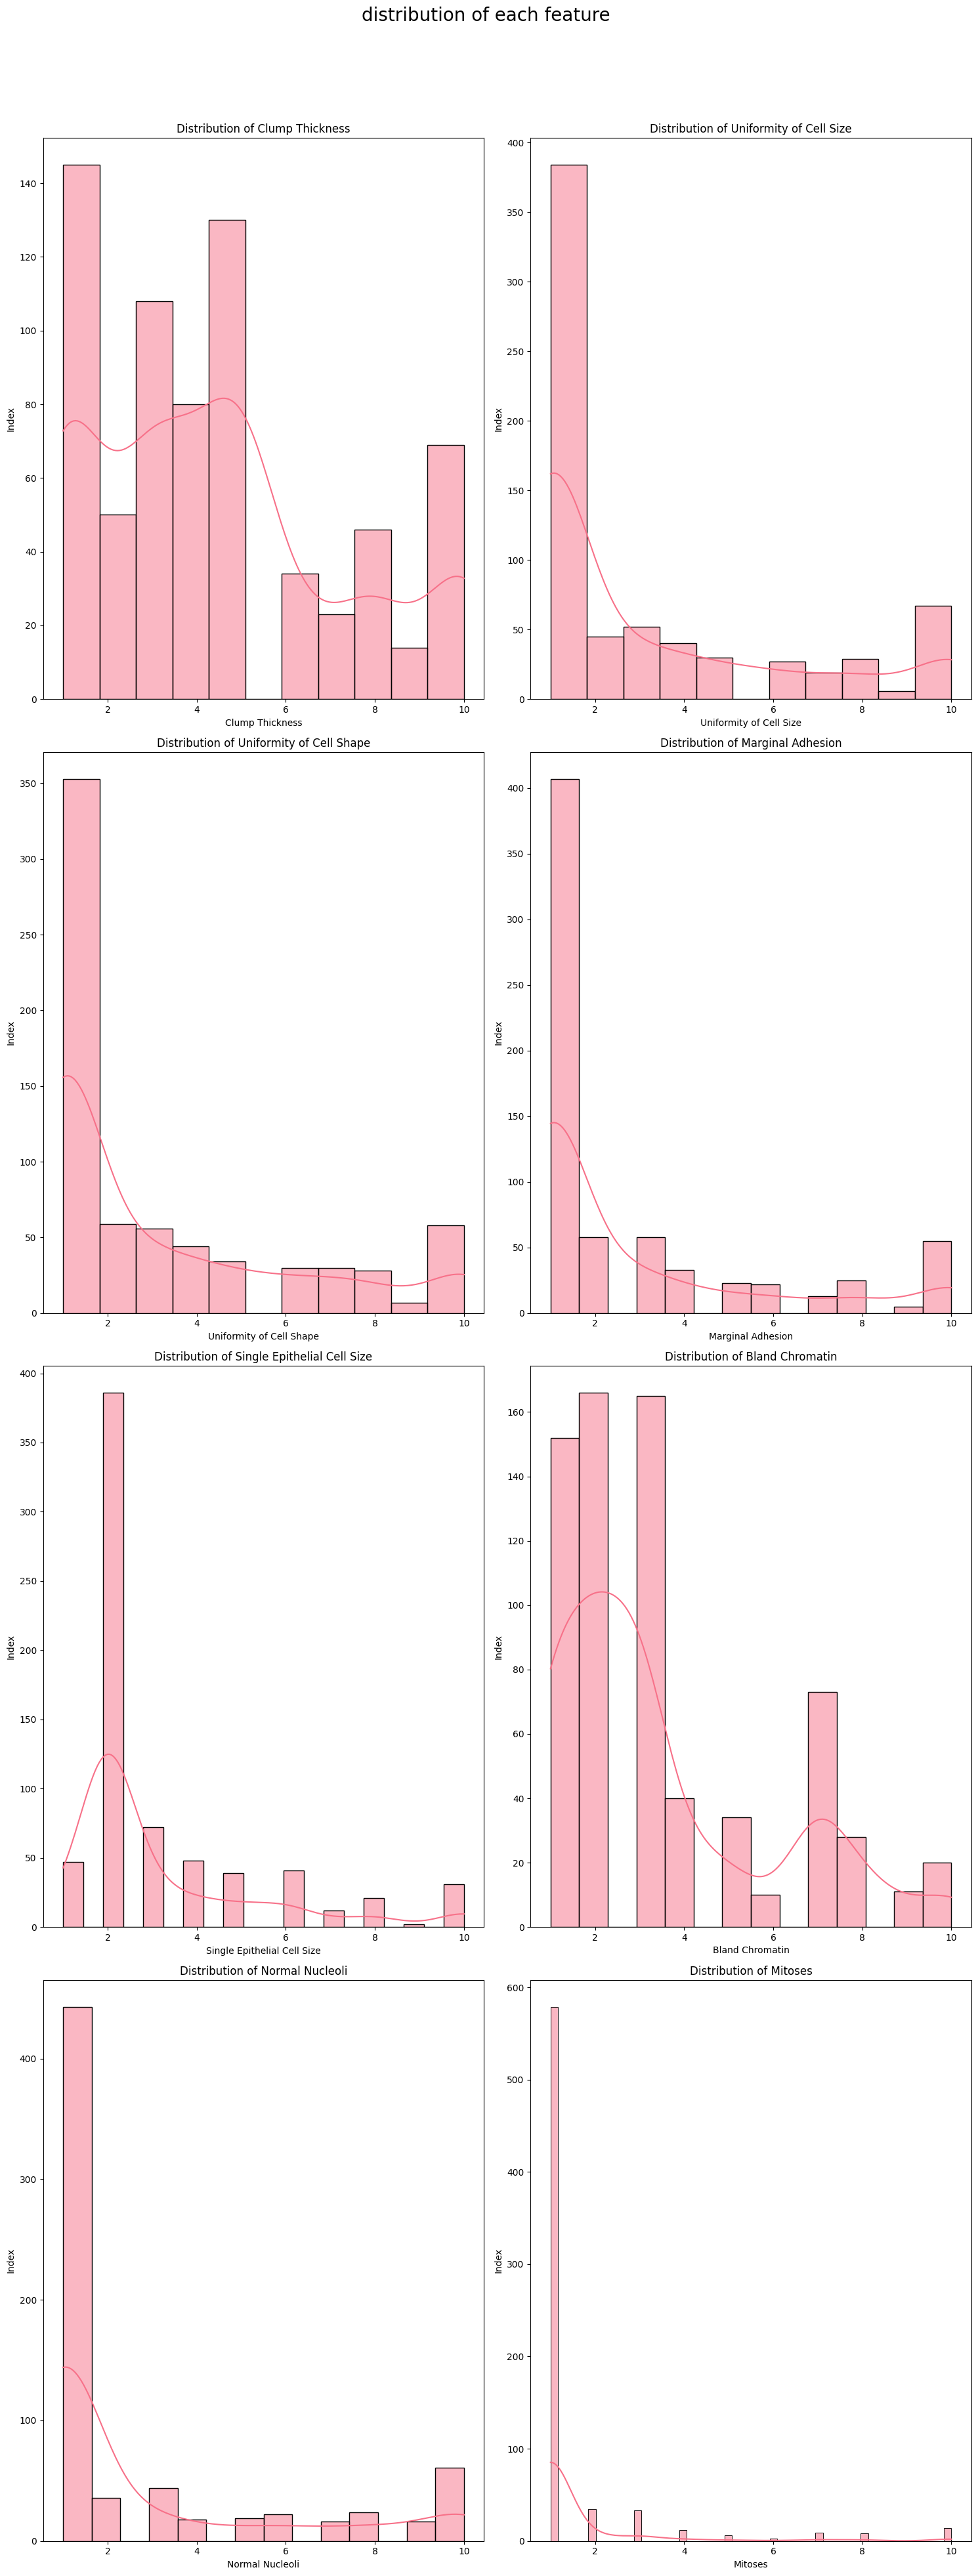

In [58]:
# data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

# distribution of each feature
fig, ax = plt.subplots(4, 2, figsize=(15, 40))
fig.suptitle("distribution of each feature ", fontsize=20)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(x=df[num], ax=ax[row, col], kde=True)
    ax[row, col].set_title(f'Distribution of {num}')
    ax[row, col].set_xlabel(num)
    ax[row, col].set_ylabel('Index')

# adjust layout to leave space for the overall title (top margin)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve the top 5% for suptitle
plt.show()

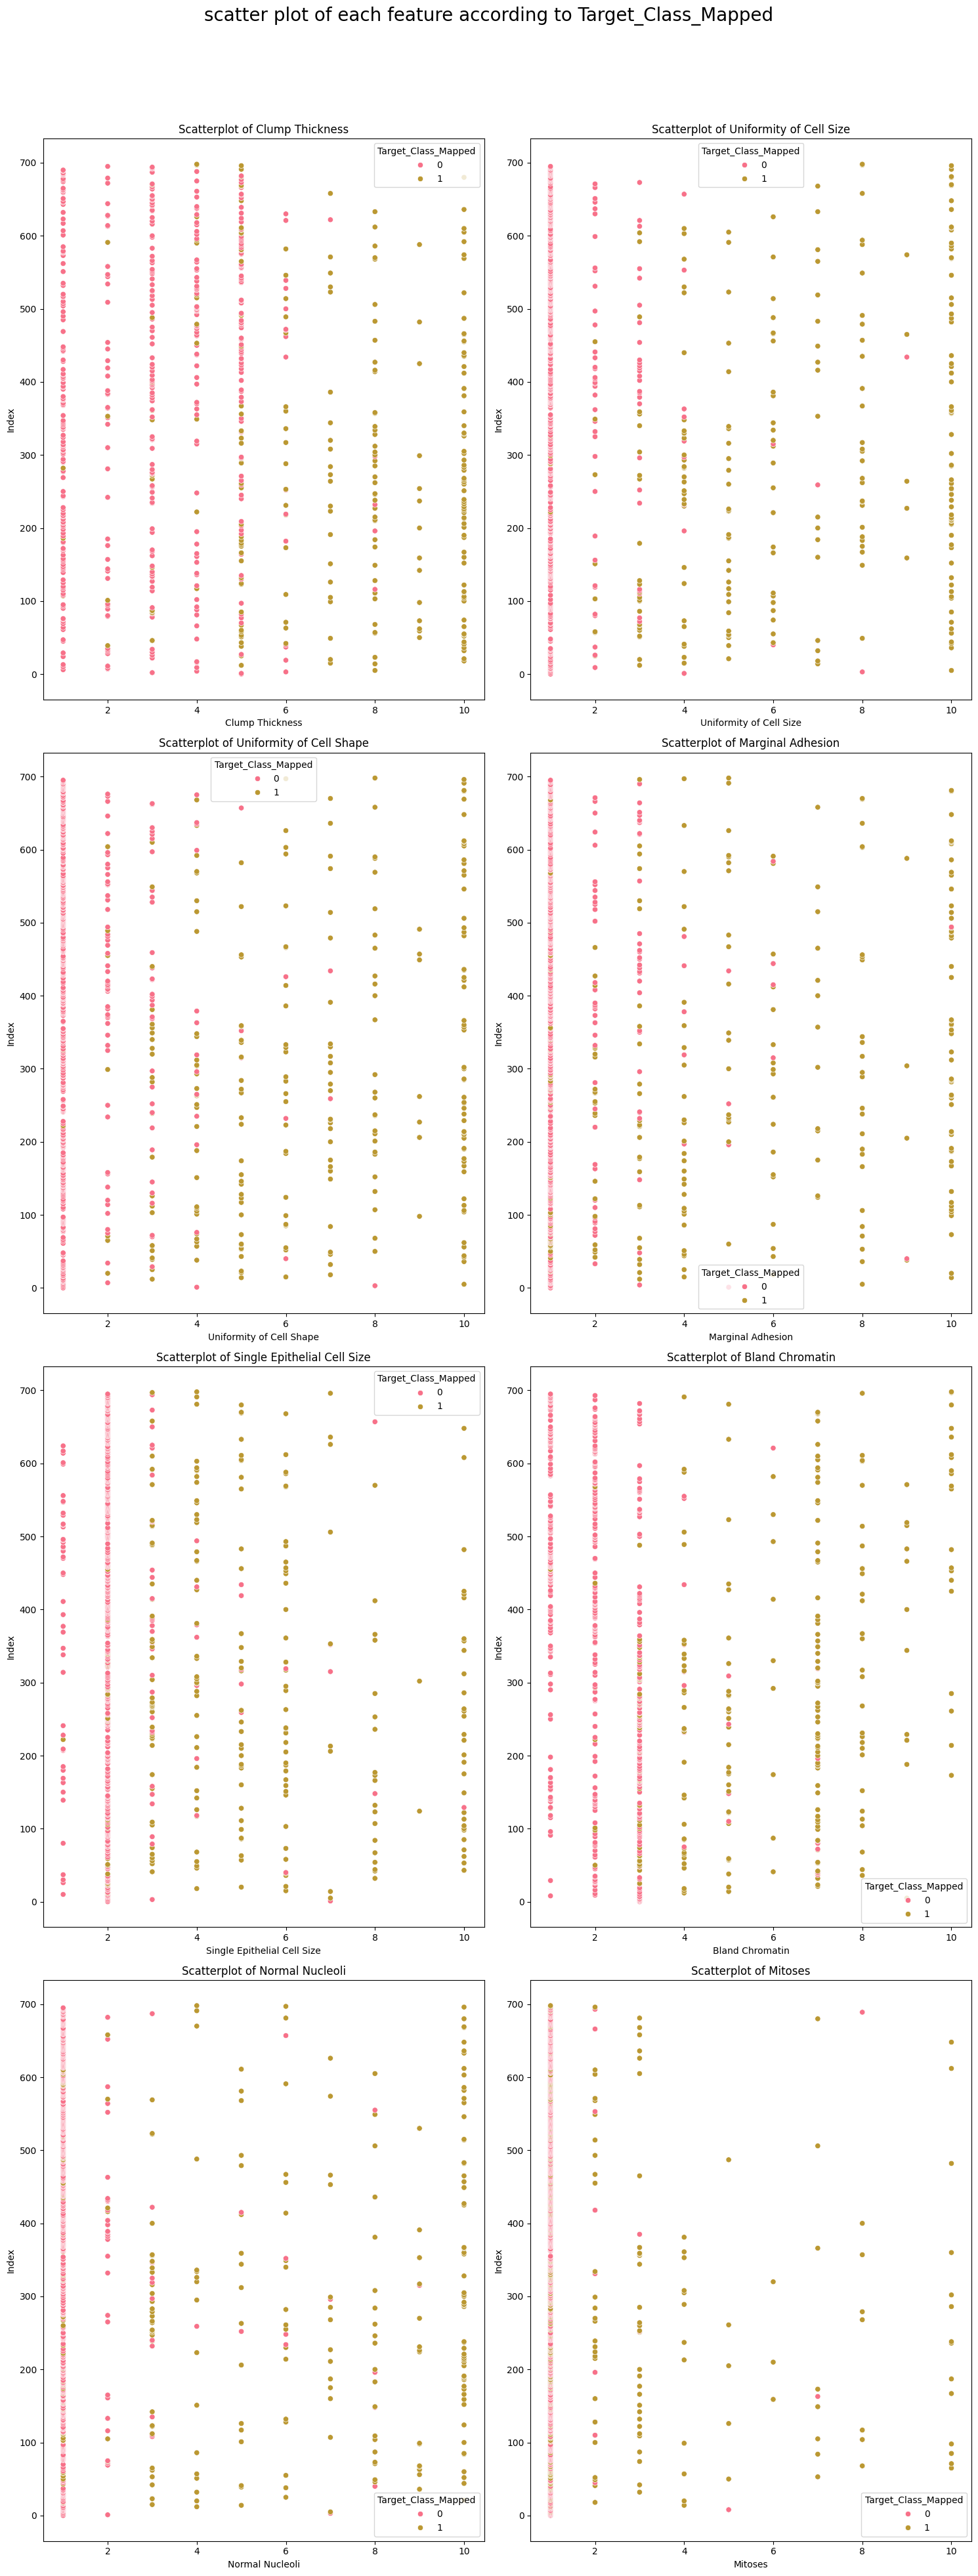

In [56]:
# scatterplot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

# add an overall centered title for the whole figure
fig.suptitle("scatter plot of each feature according to Target_Class_Mapped", fontsize=20)

# plot on individual subplots with their own titles and labels
for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=num, y=df.index, hue="Target_Class_Mapped", data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Scatterplot of {num}')
    ax[row, col].set_xlabel(num)
    ax[row, col].set_ylabel('Index')

# adjust layout to leave space for the overall title (top margin)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve the top 5% for suptitle
plt.show()

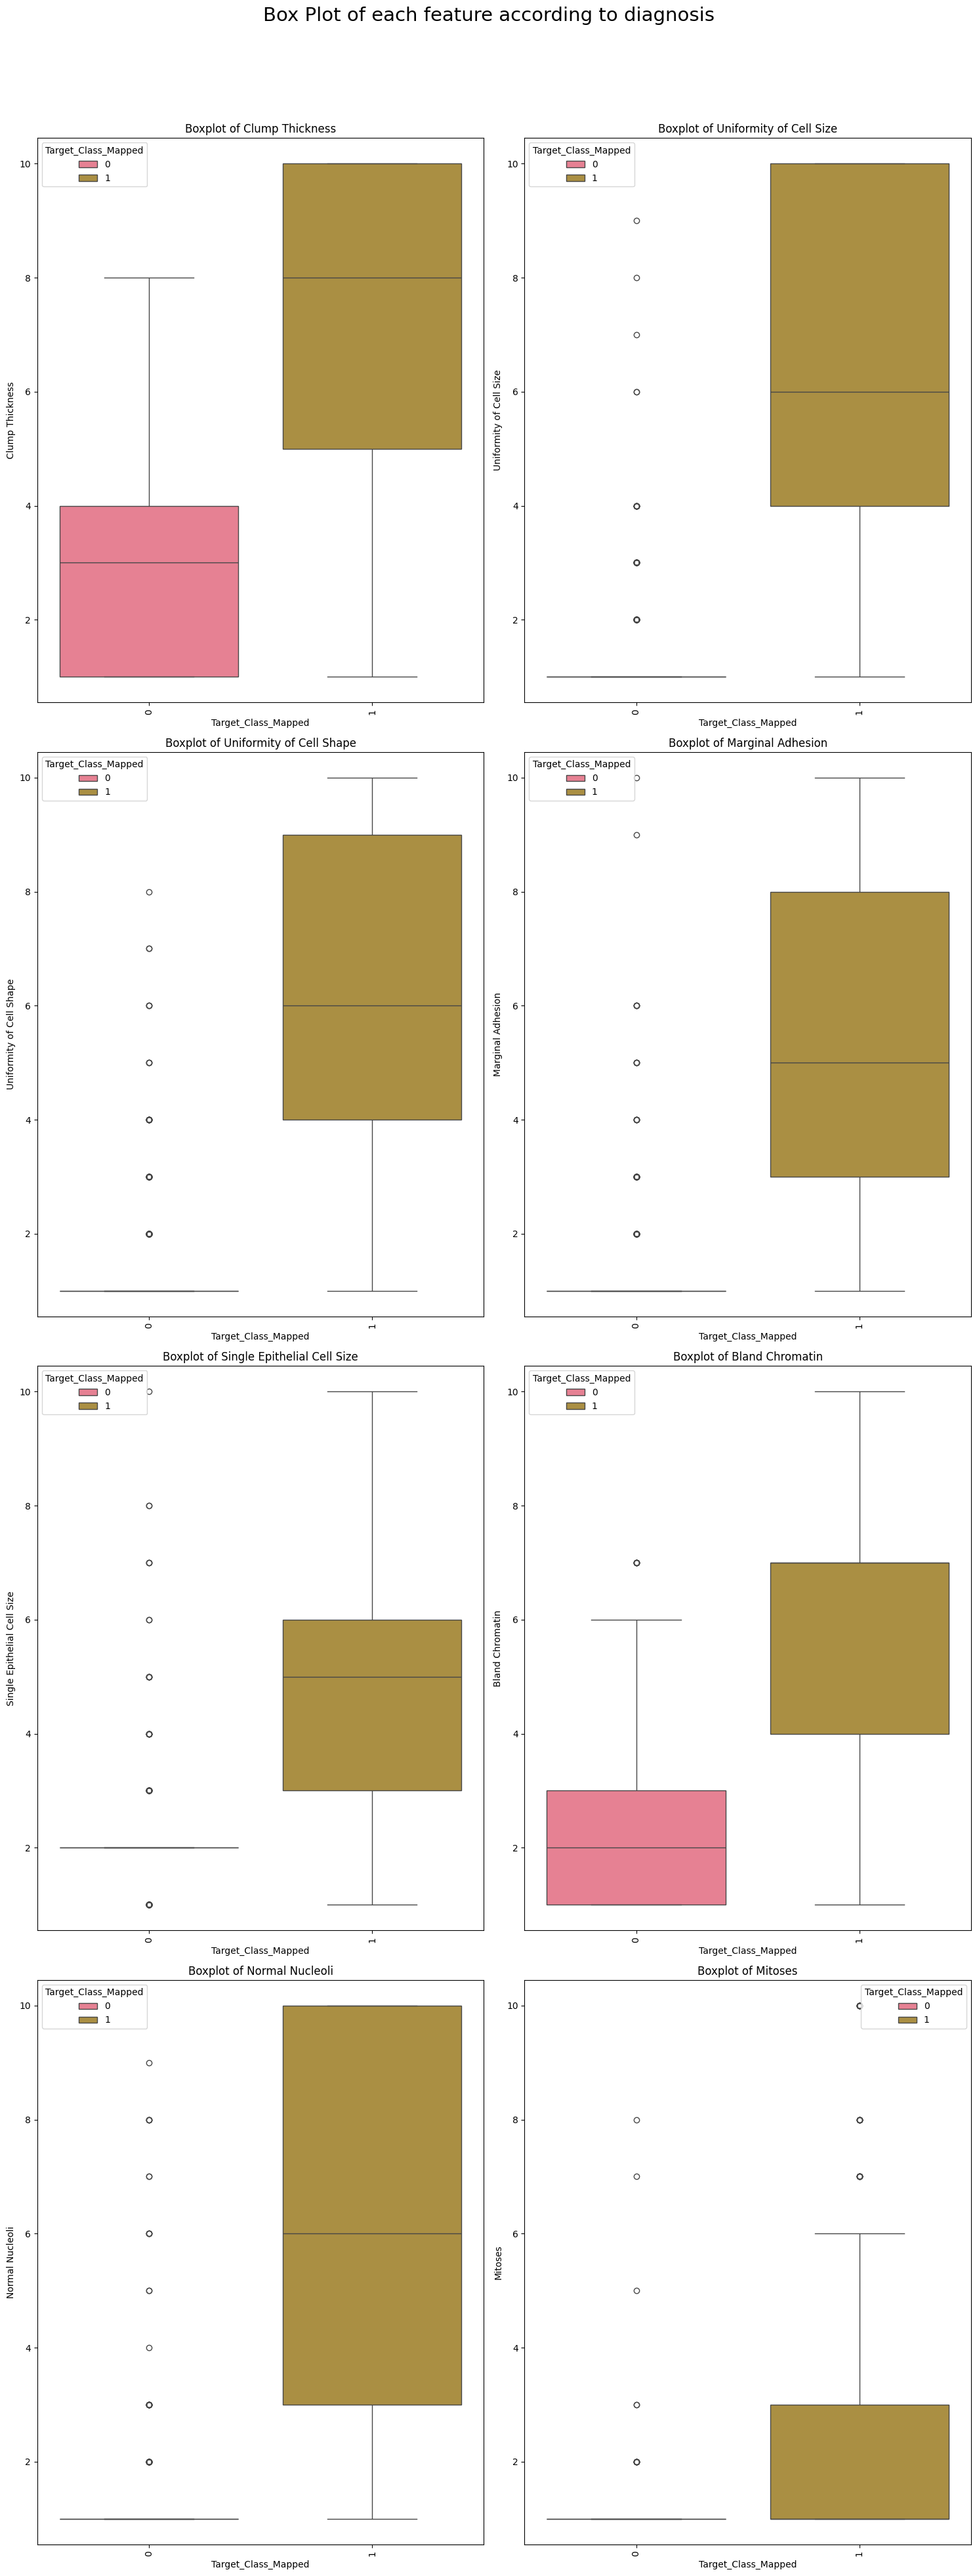

In [60]:
# boxplot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

fig.suptitle("Box Plot of each feature according to diagnosis", fontsize=21)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(x="Target_Class_Mapped", y=num, data=df, ax=ax[row, col], hue="Target_Class_Mapped")
    ax[row, col].set_title(f'Boxplot of {num}')
    ax[row, col].set_xlabel('Target_Class_Mapped')
    ax[row, col].set_ylabel(num)
    ax[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

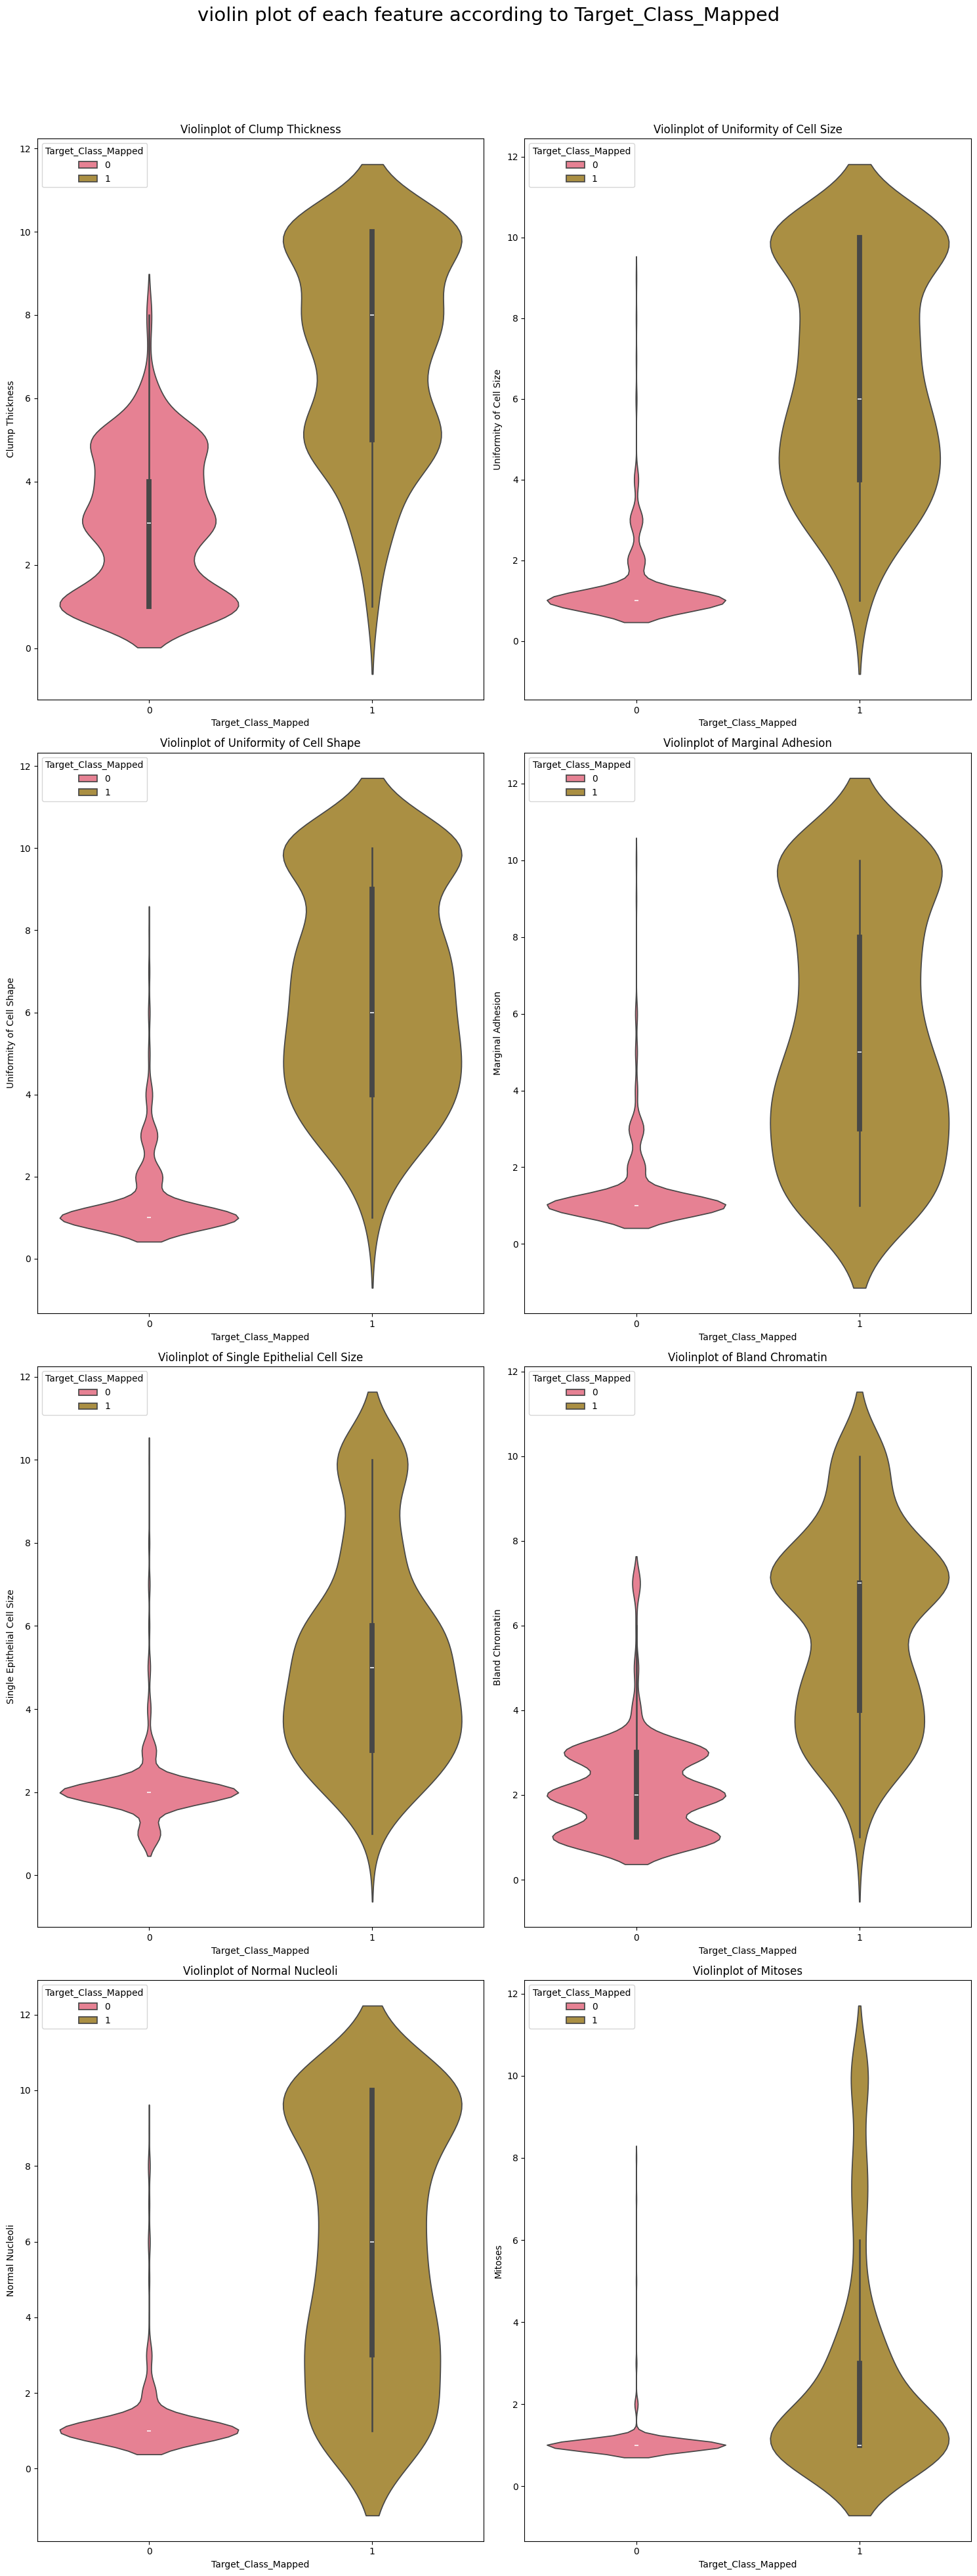

In [62]:
# violin plot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

fig.suptitle("violin plot of each feature according to Target_Class_Mapped", fontsize=21)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.violinplot(x="Target_Class_Mapped", y=num, data=df, ax=ax[row, col], hue="Target_Class_Mapped")
    ax[row, col].set_title(f'Violinplot of {num}')
    ax[row, col].set_xlabel('Target_Class_Mapped')  

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

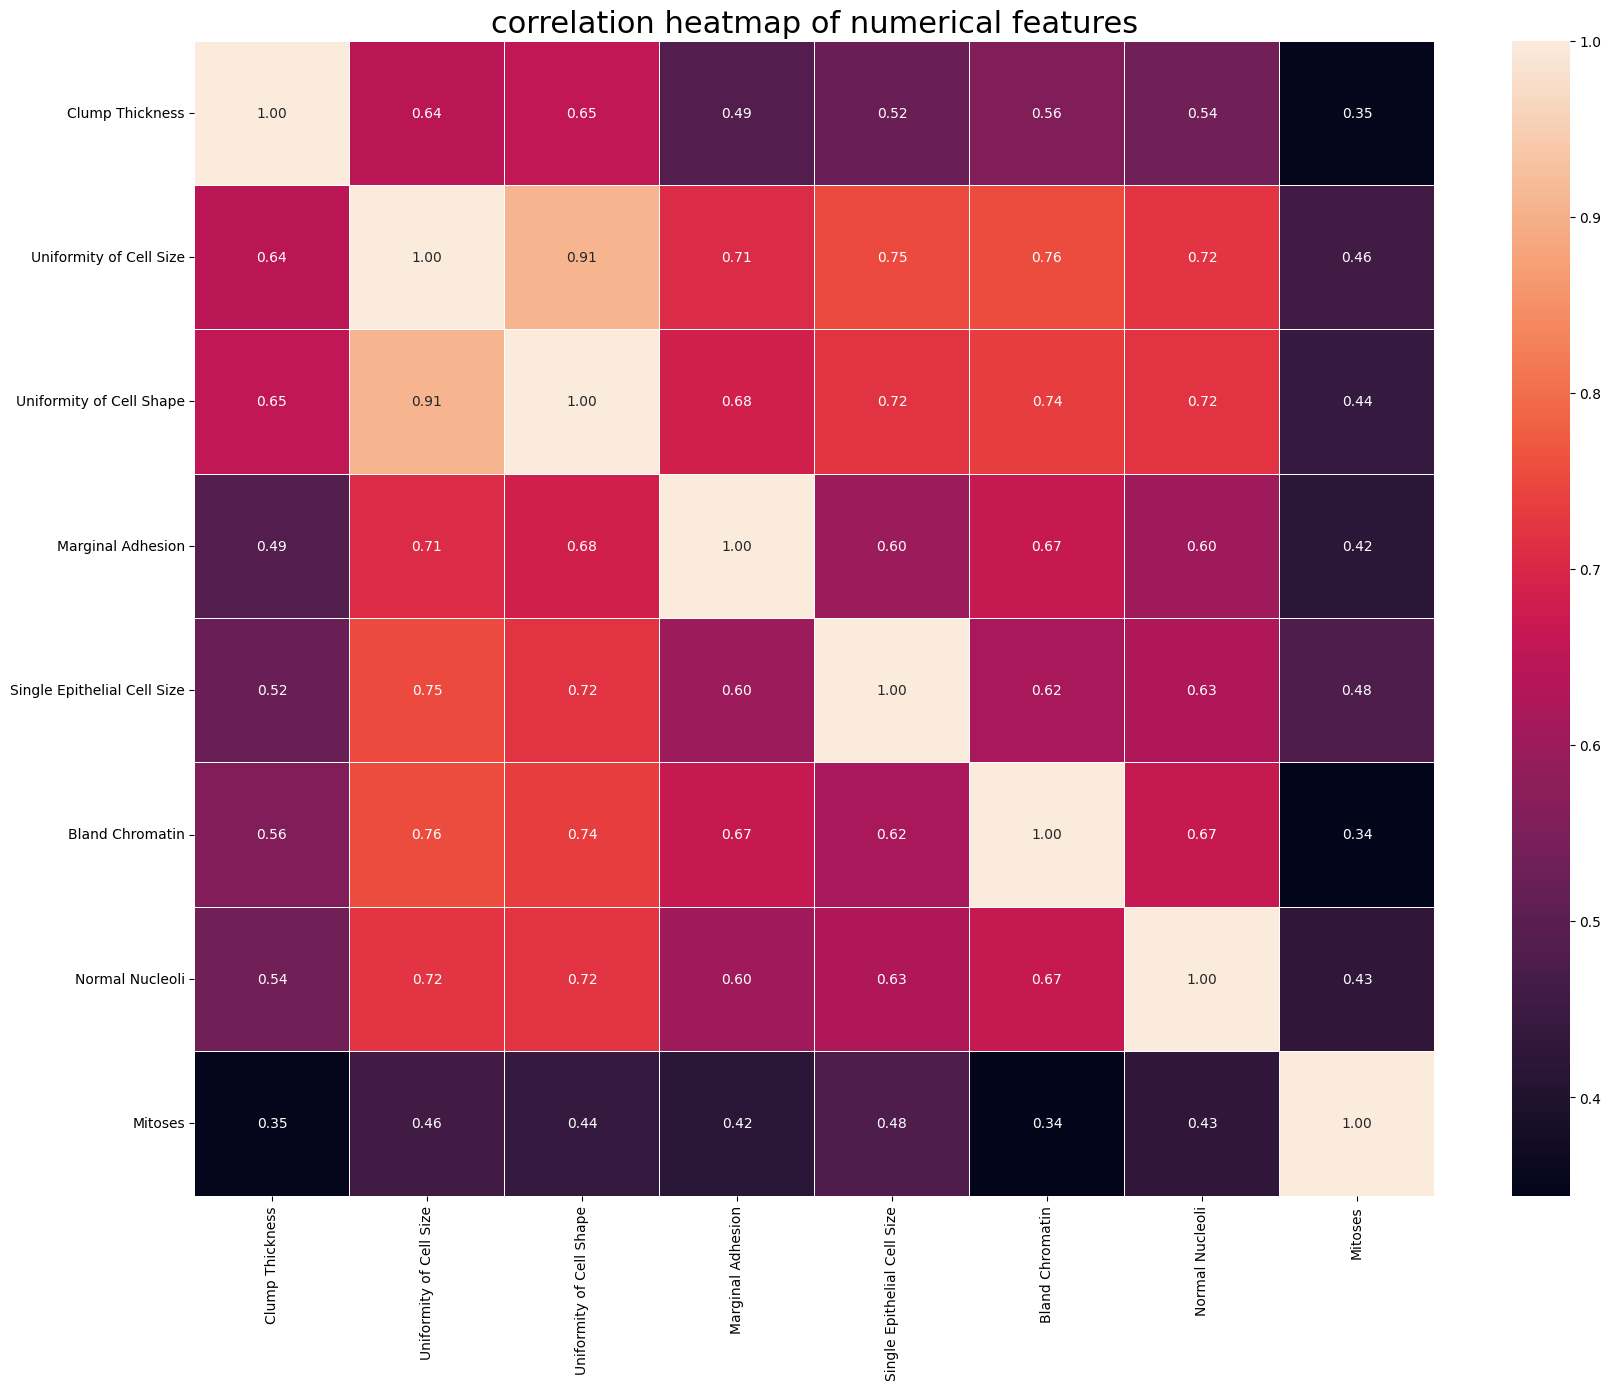

In [65]:
# correlation heatmap of numerical features

plt.figure(figsize=(20, 15))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('correlation heatmap of numerical features', fontsize=22)
plt.show()

In [66]:
# create training datasets
y = df["Target_Class_Mapped"]
X = df.drop(["Target_Class_Mapped", "Class"], axis=1)

In [67]:
# split dataset (holdout - 70% training / 30% evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# train a LogisticRegression model for classification
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
y_pred_lr = lr_model.predict(X_test)
score = accuracy_score(y_test, y_pred_lr)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9619047619047619


In [70]:
# for cancer prediction, accuracy is not the best metric to access performance
# we'd also check sensibility (recall), precision, F1-score and AUC_ROC
auroc = roc_auc_score(y_test, y_pred_lr)
print(f"AUC_ROC: {auroc:.2f}")

report = classification_report(y_test, y_pred_lr)
print(f"\nCLASSIFICATION REPORT\n {report}")

AUC_ROC: 0.95

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



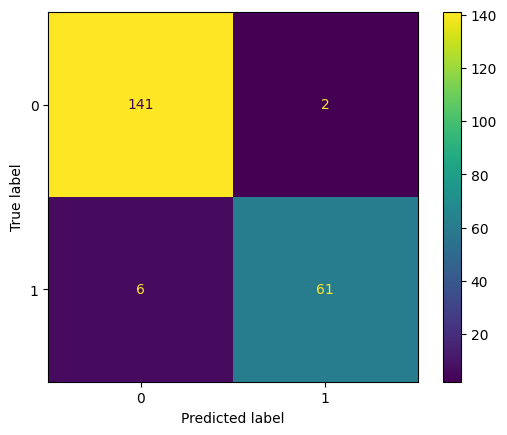

In [71]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)

disp.plot()

In [72]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

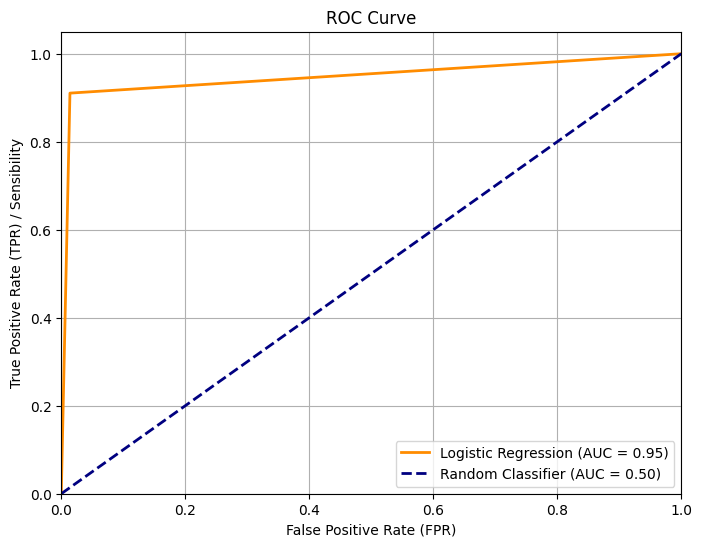


AUROC Score: 0.95


In [73]:
# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Sensibility')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nAUROC Score: {roc_auc_lr:.2f}")

In [74]:
# get coefficients (for an interpretable equation)

# coefficients
coefficients_log = lr_model.coef_[0] # coef_ is an array of arrays for LogisticRegression

# intercept
intercept_log = lr_model.intercept_[0] # intercept_ is also an array 

# get feature names for interpretability 
feature_names = X_train.columns

print(f"\n--- LogisticRegression ---")
print(f"Intercept (b0): {intercept_log:.4f}")
print("Coefficients (bi):")
for name, coef in zip(feature_names, coefficients_log):
    print(f"  {name}: {coef:.4f}")

# create equation string for the linear part (Log-Odds)
equation_parts_log = [f"{intercept_log:.4f}"]
for name, coef in zip(feature_names, coefficients_log):
    sign = "+" if coef >= 0 else "-"
    equation_parts_log.append(f"{sign} {abs(coef):.4f} * {name}")

linear_combination = " + ".join(equation_parts_log)
linear_combination = linear_combination.replace("+ -", "-")
linear_combination = linear_combination.replace("+ +", "+")

print(f"\nLinear Combination (Log-Odds):\nZ = {linear_combination}")
print(f"Cancer Probability (P) = 1 / (1 + exp(-Z))")


--- LogisticRegression ---
Intercept (b0): -9.3348
Coefficients (bi):
  Clump Thickness: 0.5182
  Uniformity of Cell Size: -0.0462
  Uniformity of Cell Shape: 0.4283
  Marginal Adhesion: 0.1885
  Single Epithelial Cell Size: 0.0254
  Bare Nuclei: 0.4539
  Bland Chromatin: 0.4105
  Normal Nucleoli: 0.0525
  Mitoses: 0.3855

Linear Combination (Log-Odds):
Z = -9.3348 + 0.5182 * Clump Thickness - 0.0462 * Uniformity of Cell Size + 0.4283 * Uniformity of Cell Shape + 0.1885 * Marginal Adhesion + 0.0254 * Single Epithelial Cell Size + 0.4539 * Bare Nuclei + 0.4105 * Bland Chromatin + 0.0525 * Normal Nucleoli + 0.3855 * Mitoses
Cancer Probability (P) = 1 / (1 + exp(-Z))
